## Clustering

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

import datetime
from datetime import datetime, timedelta

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA

#from pycaret.clustering import *

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

These exercises will work with the tissue_gene_expression dataset, which is part of the dslabs package.

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("tissue.csv")

In [3]:
df

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [4]:
X = df.iloc[:,0:500]

In [5]:
X.values

array([[ 9.82567961,  8.3271627 ,  5.4993819 , ...,  4.76001706,
         8.23018205,  6.74038468],
       [ 9.63124675,  8.54282676,  5.64429229, ...,  4.95237261,
         8.33250157,  6.39068256],
       [ 9.69054774,  8.47648577,  5.71718694, ...,  4.79623236,
         7.97819429,  6.67703781],
       ...,
       [ 9.3618059 ,  8.26365314, 10.29656824, ...,  4.88436628,
         8.1768516 ,  5.61143535],
       [ 9.3460355 ,  8.71853424,  9.66081321, ...,  4.9512614 ,
         8.63041198,  5.79046804],
       [ 9.44789324,  8.25538598,  8.46580862, ...,  4.99628241,
         8.70066461,  5.17747408]])

## Standardize all values

In [6]:
scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 1.18709707, -0.40845593, -2.02831662, ..., -1.57398602,
        -0.64478684, -0.9530239 ],
       [ 0.74917727, -0.14846706, -1.91794504, ..., -0.49115944,
        -0.37007481, -1.39205101],
       [ 0.88274048, -0.22844292, -1.86242454, ..., -1.37011931,
        -1.32133485, -1.03255156],
       ...,
       [ 0.14231748, -0.48501843,  1.62547937, ..., -0.87398729,
        -0.78797083, -2.37034262],
       [ 0.1067979 ,  0.06335308,  1.14125403, ..., -0.49741481,
         0.4297684 , -2.14557931],
       [ 0.33621141, -0.49498471,  0.23107405, ..., -0.24397815,
         0.61838581, -2.91515133]])

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

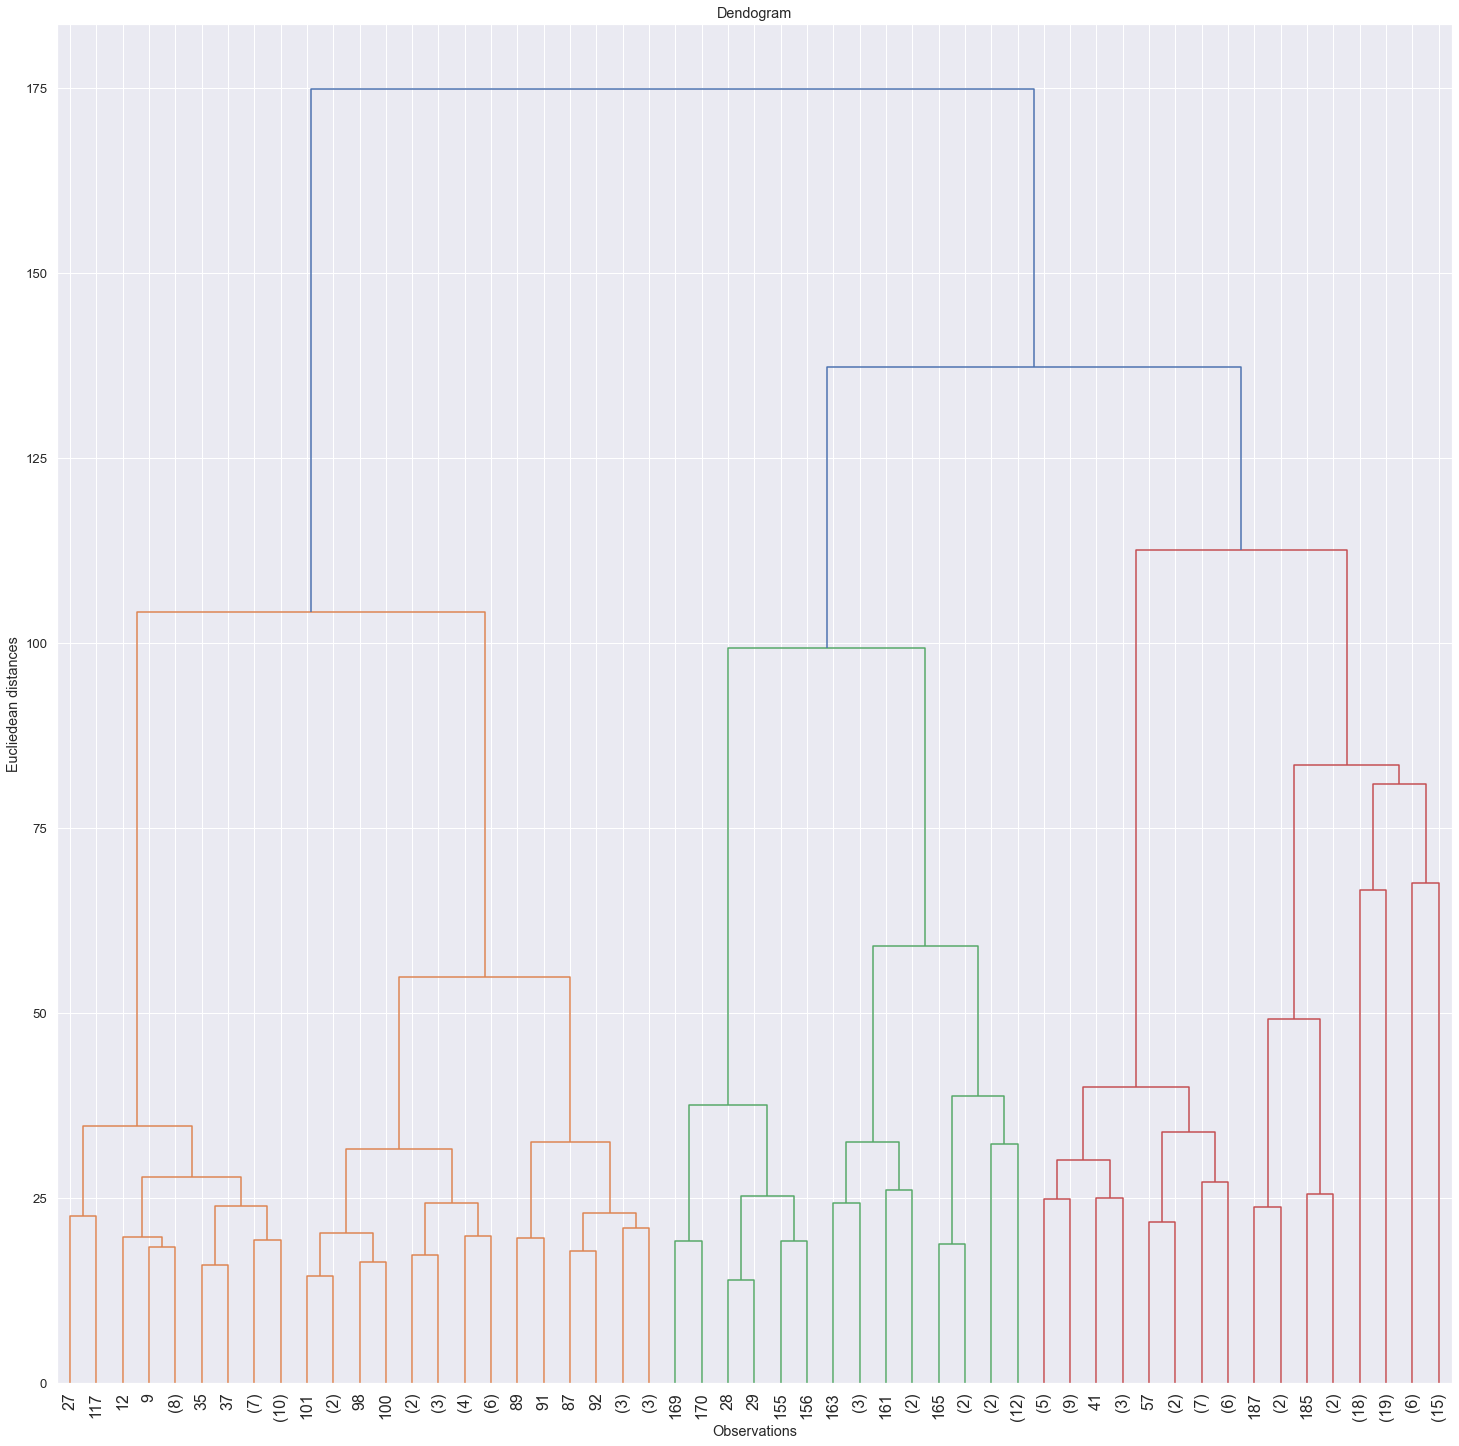

In [10]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

Select the 50 most variable genes. Make sure the observations show up in the columns, that the predictor are centered, and add a color bar to show the different tissue types. Hint: use the ColSideColors argument to assign colors. Also, use col = RColorBrewer::brewer.pal(11, "RdBu") for a better use of colors.